# CNN

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [19]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

# Conv2D는 width*height*channel을 입력으로 받음
train_x = train_x.reshape((60000, 28, 28, 1)) # ADDED
test_x = test_x.reshape((10000, 28, 28, 1)) # ADDED

train_y = raw_train_y
test_y = raw_test_y

In [31]:

model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


hist = model.fit(train_x, train_y, epochs=5, verbose=1, validation_split=0.1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                16010     
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


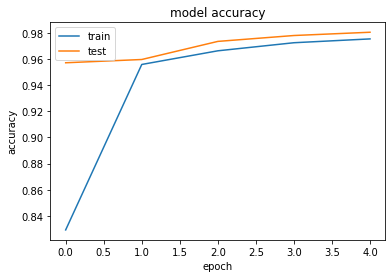

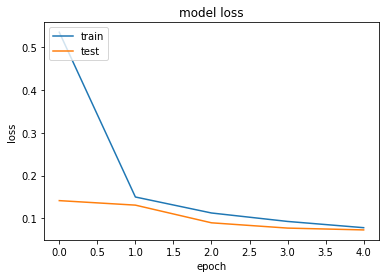

In [32]:
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


n_classes = 10

In [34]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(arr):
  if len(arr.shape)==1:
    arr = np.expand_dims(arr, -1)

  enc = OneHotEncoder()
  enc.fit(arr)

  encoded = enc.transform(arr).toarray()

  return encoded

In [35]:
fpr = dict()
tpr = dict()
roc_auc = dict()

test_y_encoed = one_hot_encode(test_y)
predicted_encoded = one_hot_encode(predicted)

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(test_y_encoed[:, i], predicted_encoded[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(test_y_encoed.ravel(), predicted_encoded.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

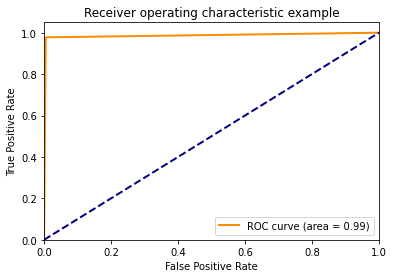

In [36]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()